In [72]:
import pandas as pd
import os
from BitVector import BitVector
import sys
import time 
import csv
import vcf
import gzip
import shutil
import matplotlib.pyplot as plt


In [10]:
#read output files
both_file = open('output_K562_distal_both_FDR_0.1.txt', 'r')
both = both_file.readlines()

depleted_file = open('output_K562_distal_depleted_FDR_0.1.txt', 'r')
depleted = depleted_file.readlines()

enriched_file = open('output_K562_distal_enriched_FDR_0.1.txt', 'r')
enriched = enriched_file.readlines()

nonsig_file = open('output_K562_distal_nonsig_FDR_0.1.txt', 'r')
nonsig = nonsig_file.readlines()

allregions = [both, depleted, enriched, nonsig]

In [11]:
def findNumFiles(lines):
    count = 0
    for line in lines:
        if 'Record' not in line:
            count+=1
    return count


In [12]:
print('both: ' + str(findNumFiles(both)))
print('depleted: ' + str(findNumFiles(depleted)))
print('enriched: ' + str(findNumFiles(enriched)))
print('nonsig: ' + str(findNumFiles(nonsig)))

both: 500
depleted: 1020
enriched: 470
nonsig: 72


In [13]:
def findNumHits(lines):
    count = 0
    for line in lines:
        if 'Record' in line:
            count+=1
    return count

In [14]:
print('both: ' + str(findNumHits(both)))
print('depleted: ' + str(findNumHits(depleted)))
print('enriched: ' + str(findNumHits(enriched)))
print('nonsig: ' + str(findNumHits(nonsig)))

both: 966
depleted: 3161
enriched: 842
nonsig: 81


In [15]:
def findVarClassificationDist(lines):
    variants = {}
    count = 0
    for line in lines:
        if 'Record' in line:
            record_halves = line.split('....') 
            info = record_halves[1]
            parts = info.split(';')
            for part in parts:
                if 'Variant_Classification' in part:
                    var_classification = part[22:]
                    if var_classification not in variants:
                        variants[var_classification] = 0
                    variants[var_classification] +=1
    return variants
            
        
    

In [16]:
print(findVarClassificationDist(both))

{'Intron': 373, 'IGR': 440, 'lincRNA': 47, 'Missense_Mutation': 26, "3'UTR": 30, 'RNA': 42, 'Silent': 5, "5'Flank": 1, "5'UTR": 2}


In [34]:
def findNumHitsPerFile(allregions):
    file_map = {}
    for region in allregions:
        current_entry = ""
        for entry in region:
            if 'Record' not in entry: #if we're at a file name
                current_entry = entry
                if entry not in file_map:
                    file_map[entry] = 0
            else:
                file_map[current_entry] +=1
    return file_map

In [82]:
hitsPerFile = findNumHitsPerFile(allregions)
print(len(hitsPerFile))
lst_of_num_hits = []
for entry in hitsPerFile:
    lst_of_num_hits.append(hitsPerFile[entry])

shortened = []
for i in lst_of_num_hits:
    if i >4:
        shortened.append(i)
        
print(len(shortened) - len(lst_of_num_hits))
print(shortened.sort(reverse=True))
print(shortened)

1239
-1031
None
[161, 153, 125, 118, 103, 76, 71, 64, 63, 61, 50, 45, 42, 39, 38, 38, 35, 34, 32, 31, 29, 27, 27, 26, 24, 24, 22, 22, 22, 21, 21, 21, 19, 19, 18, 18, 18, 17, 17, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


Text(0, 0.5, 'Number of Sequences')

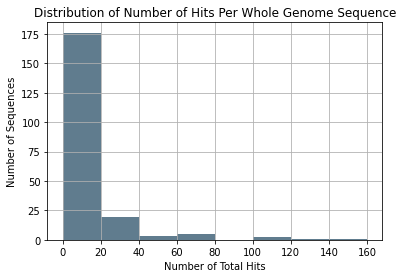

In [78]:
hist_stuff = pd.Series(shortened)
bins_list = [0,20,40,60,80,100,120,140,160]

plt.hist(shortened,bins=bins_list,color='#607c8e')
plt.grid()
plt.title("Distribution of Number of Hits Per Whole Genome Sequence")
plt.xlabel("Number of Total Hits")
plt.ylabel("Number of Sequences")


In [ ]:
#see which region had the most hits